<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df['variety']=df['variety'].replace('Setosa',0)
df['variety']=df['variety'].replace('Versicolor',1)
df['variety']=df['variety'].replace('Virginica',2)
df.head()

/tmp/ipython-input-2860281651.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety']=df['variety'].replace('Virginica',2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop('variety',axis=1)
y = df['variety']

In [ ]:
X = X.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
#Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.125203251838684
Epoch: 10 Loss: 1.0097211599349976
Epoch: 20 Loss: 0.8162347674369812
Epoch: 30 Loss: 0.585993230342865
Epoch: 40 Loss: 0.4003389775753021
Epoch: 50 Loss: 0.26794716715812683
Epoch: 60 Loss: 0.1796349585056305
Epoch: 70 Loss: 0.12165623158216476
Epoch: 80 Loss: 0.0860651507973671
Epoch: 90 Loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

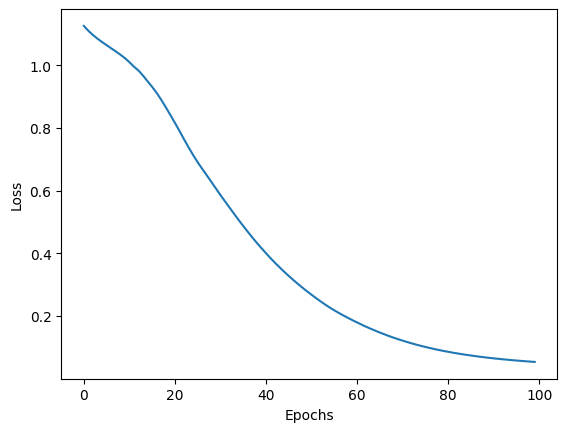

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [ ]:
loss

tensor(0.1315)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')

    if y_val.argmax().item()==y_test[i]:
      correct+=1

 1. tensor([-5.8771,  4.4629,  6.5155])    2
 2. tensor([-7.5451,  4.1668,  9.7293])    2
 3. tensor([-8.4517,  5.1275, 10.2015])    2
 4. tensor([-4.3411,  5.6280,  2.5636])    1
 5. tensor([-7.1838,  4.8757,  8.3023])    2
 6. tensor([-3.3940,  5.3421,  1.2802])    1
 7. tensor([-5.9240,  4.9826,  6.0025])    2
 8. tensor([-4.2895,  5.7016,  2.3920])    1
 9. tensor([-6.5369,  4.9261,  7.1291])    2
10. tensor([-8.0526,  4.4129, 10.3325])    2
11. tensor([-5.6775,  4.9505,  5.6248])    2
12. tensor([ 4.5748, -2.2579, -2.8925])    0
13. tensor([ 4.2646, -2.0055, -2.7342])    0
14. tensor([-2.1081,  4.0482,  0.5803])    1
15. tensor([ 3.4608, -1.2147, -2.3488])    0
16. tensor([-5.4739,  5.1174,  5.0966])    2
17. tensor([ 4.0637, -1.8045, -2.6504])    0
18. tensor([-5.8090,  4.6057,  6.2494])    1
19. tensor([ 4.9250, -2.5763, -3.0545])    0
20. tensor([ 3.4559, -1.2559, -2.3637])    0
21. tensor([-2.6161,  4.5584,  0.8575])    1
22. tensor([-7.7427,  4.7379,  9.4233])    2
23. tensor

In [ ]:
correct

28